In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import scipy
import numpy as np

In [46]:
os.getcwd()

'/Users/elifriedmann/Downloads'

In [47]:
path=os.chdir('/Users/elifriedmann/Downloads')

In [48]:
df3= pd.read_excel('Refinitiv Data1.xlsx', index_col=0)

In [49]:
matrixcor=df3.corr(numeric_only=True)
matrixcor

,ESG Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,...,Policy Bribery and Corruption,Policy Business Ethics,Policy Community Involvement,Policy Data Privacy,Market Cap,YTD (%),Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM"
ESG Score,1.000000,-0.138295,0.733202,0.706403,0.605188,0.733077,0.571042,0.705082,0.572673,0.626827,...,0.261290,0.192922,0.343618,0.088384,0.406153,0.035826,0.282851,0.074863,-0.027527,0.000786
ESG Controversies Score,-0.138295,1.000000,-0.251399,-0.222611,-0.278297,-0.080660,-0.267169,-0.104113,-0.087148,0.042110,...,-0.073189,-0.047057,0.041838,-0.018767,-0.506594,-0.065761,-0.139401,0.021982,-0.198803,-0.021129
Resource Use Score,0.733202,-0.251399,1.000000,0.848077,0.633638,0.623713,0.724125,0.504348,0.510634,0.166299,...,0.159665,0.090972,0.202367,0.044250,0.525651,0.003365,0.293032,0.153817,0.053993,0.039718
Emissions Score,0.706403,-0.222611,0.848077,1.000000,0.604518,0.630400,0.626413,0.515603,0.513366,0.134301,...,0.166552,0.084199,0.228299,0.054369,0.440467,0.052328,0.313676,0.136506,0.030277,0.043388
Environmental Innovation Score,0.605188,-0.278297,0.633638,0.604518,1.000000,0.502329,0.465478,0.391532,0.410896,0.126128,...,0.102702,0.084860,0.164492,0.033843,0.447966,-0.005551,0.242317,0.071138,-0.075464,-0.027962
Workforce Score,0.733077,-0.080660,0.623713,0.630400,0.502329,1.000000,0.434803,0.498315,0.396237,0.170776,...,0.159379,0.108784,0.356225,0.084009,0.342259,-0.024642,0.229151,0.077619,-0.070091,-0.002164
Human Rights Score,0.571042,-0.267169,0.724125,0.626413,0.465478,0.434803,1.000000,0.317443,0.298919,0.140829,...,0.087757,0.034967,0.114724,0.028342,0.539579,-0.032707,0.200718,0.072823,0.071524,-0.016687
Community Score,0.705082,-0.104113,0.504348,0.515603,0.391532,0.498315,0.317443,1.000000,0.453844,0.223978,...,0.544898,0.434936,0.388622,0.129794,0.215971,0.047742,0.282054,0.100308,0.004188,0.034632
Product Responsibility Score,0.572673,-0.087148,0.510634,0.513366,0.410896,0.396237,0.298919,0.453844,1.000000,0.137567,...,0.131506,0.146787,0.268771,0.198033,0.252695,0.108035,0.254003,0.099679,0.023357,0.034523
Management Score,0.626827,0.042110,0.166299,0.134301,0.126128,0.170776,0.140829,0.223978,0.137567,1.000000,...,0.046746,0.012449,0.127987,0.010224,0.103215,0.011150,0.021389,-0.037968,-0.071586,-0.034087


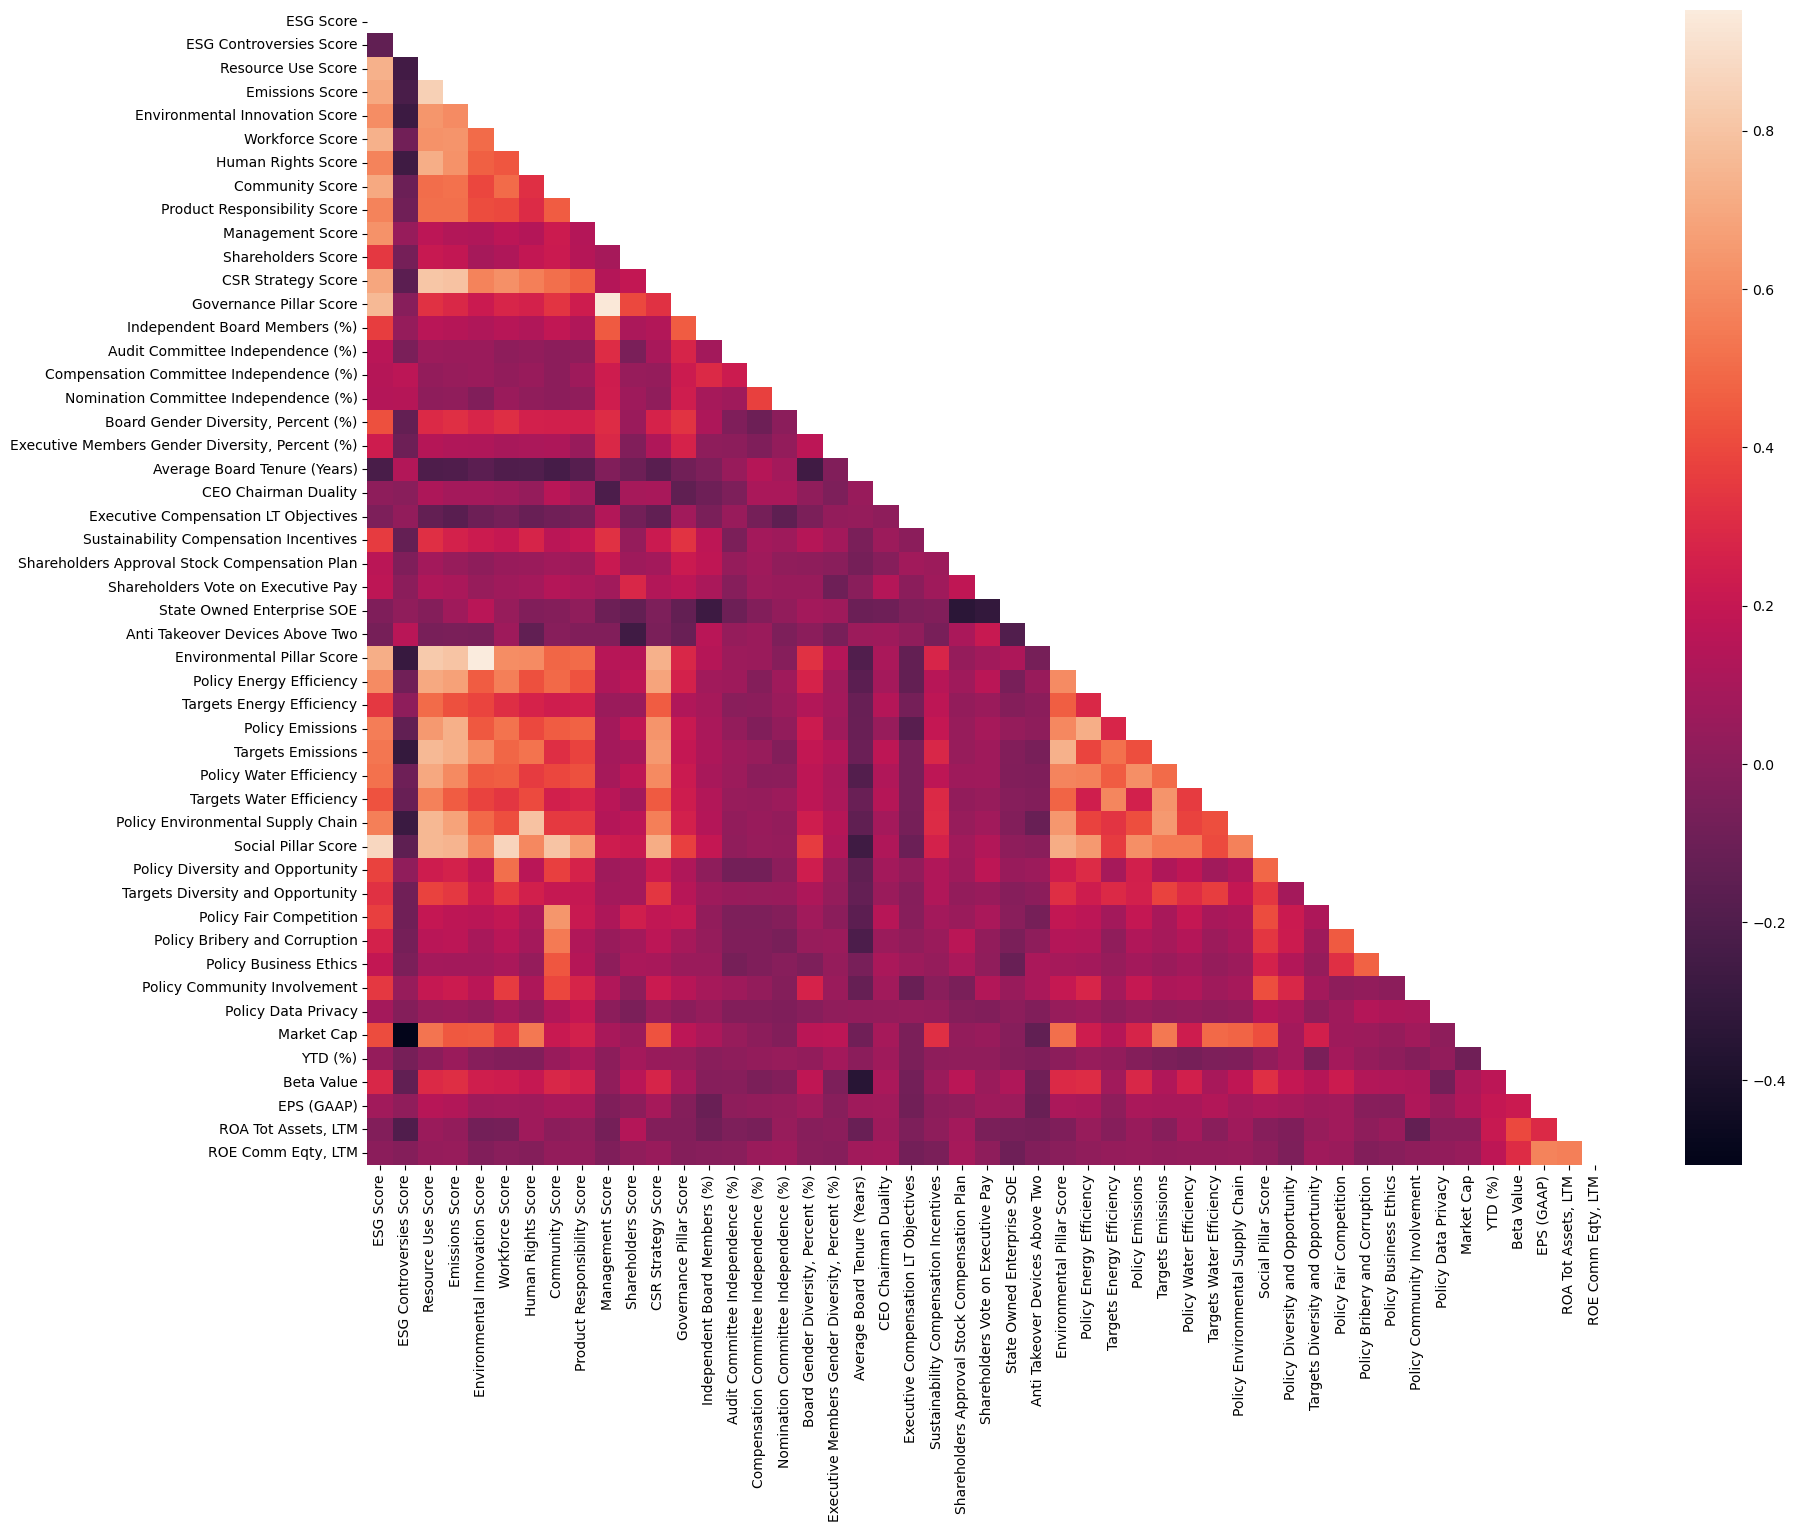

In [51]:
plt.subplots(figsize=(20,15))
mask=np.triu(np.ones_like(matrixcor, dtype=bool))
sns.heatmap(matrixcor, mask=mask);

In [53]:
df3['Size']=''
mkt='Market Cap'
M=1000000
for i in df3[mkt].index:
    if df3.loc[i, mkt] > 10000*M:
        df3.loc[i,'Size']='Large'
    elif df3.loc[i, mkt] < 1000*M:
        df3.loc[i,'Size']='Small'
    else:
        df3.loc[i,'Size']='Medium'

In [54]:
df3['Size'].value_counts()

Size
Small     206
Medium    108
Large      17
Name: count, dtype: int64

In [55]:

df3[mkt+' Augmented']=0
for i in df3.index:
    df3.loc[i, mkt+' Augmented']=np.log(df3.loc[i, mkt])
df3.drop(mkt, axis=1, inplace=True)
df3[mkt+ ' Augmented'].median()

20.06824077263001

p=[]
for col in df3:
    if df3[col].dtype==object or df3[col].dtype==bool:
        continue
    else:
        print(df3[col].dtype)
        x=0
        for n in df3[col].index:
            if abs(df3.loc[n,col]) > (df3[col].mean()+(3*df3[col].std())):
                p.append(n)
                x=x+1
        print(col, x,'\n---------------')
p=list(set(p))
df3.drop(p, axis=0, inplace=True)
df3

In [56]:
dfscaled=pd.DataFrame()
scaler=MinMaxScaler()
for col in df3:
    if df3[col].dtype!=object and df3[col].dtype!=bool:
        dfscaled[[col+' Scaled']]=scaler.fit_transform(df3[[col]])
        print(df3[col].value_counts())
    else:
        dfscaled.index=df3.index
        dfscaled[col]=df3[col]
        continue
dfscaled.index=df3.index
dfscaled['Name']=df3['Name']
dfscaled['Size']=df3['Size']
dfscaled['RIC']=df3['RIC']

ESG Score
27.76    2
41.72    2
35.80    2
43.02    2
20.75    2
        ..
78.87    1
81.28    1
84.66    1
16.45    1
7.83     1
Name: count, Length: 322, dtype: int64
ESG Controversies Score
100    314
67       4
92       3
87       1
4        1
10       1
23       1
12       1
8        1
7        1
6        1
40       1
9        1
Name: count, dtype: int64
Resource Use Score
0     233
6      27
24     11
20     10
15      5
34      4
68      3
64      3
26      3
41      2
55      2
44      2
36      2
16      2
96      2
51      1
70      1
58      1
49      1
61      1
77      1
71      1
33      1
48      1
62      1
75      1
90      1
92      1
95      1
98      1
29      1
45      1
28      1
17      1
27      1
Name: count, dtype: int64
Emissions Score
0     196
11     54
4       9
27      6
37      5
49      4
25      4
34      3
23      3
17      3
20      3
36      2
59      2
33      2
72      2
78      2
30      2
89      2
31      2
29      2
18      2
52      2
97    

In [57]:
dfscaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 330
Data columns (total 52 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Name                                                    331 non-null    object 
 1   ESG Score Scaled                                        331 non-null    float64
 2   ESG Controversies Score Scaled                          331 non-null    float64
 3   Resource Use Score Scaled                               331 non-null    float64
 4   Emissions Score Scaled                                  331 non-null    float64
 5   Environmental Innovation Score Scaled                   331 non-null    float64
 6   Workforce Score Scaled                                  331 non-null    float64
 7   Human Rights Score Scaled                               331 non-null    float64
 8   Community Score Scaled                       

In [59]:
for d in df3:
    n0=0
    for c in df3.index:
        if df3[d][c]==0:
            n0=n0+1
    if n0/(max(df3.index)+1) * 100 > 95:
        print(d, str((n0/(max(df3.index)+1)) * 100)+'%',df3[d].dtype)
        df3.drop(d, axis=1, inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 330
Data columns (total 47 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Name                                             331 non-null    object 
 1   ESG Score                                        331 non-null    float64
 2   ESG Controversies Score                          331 non-null    int64  
 3   Resource Use Score                               331 non-null    int64  
 4   Emissions Score                                  331 non-null    int64  
 5   Environmental Innovation Score                   331 non-null    int64  
 6   Workforce Score                                  331 non-null    int64  
 7   Human Rights Score                               331 non-null    int64  
 8   Community Score                                  331 non-null    int64  
 9   Product Responsibility Score         

In [60]:
x,y=[],[]
for i in df3['Size'].index:
    if df3.loc[i,'Size']!='Small':
        x.append(i)
    #elif df3.loc[i,'Size']!='Medium':
    else:
        y.append(i)
small=df3.drop(x, axis=0)
smalls=dfscaled.drop(x, axis=0)
medium=df3.drop(y, axis=0)
mediums=dfscaled.drop(y, axis=0)
small

,Name,ESG Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,...,Policy Community Involvement,Policy Data Privacy,Size,RIC,YTD (%),Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM",Market Cap Augmented
125,Amalgamated Bank,62.26,100,71,54,69,58,60,59,74,...,True,True,Small,AMAL.O,29.166666,0.777283,2.612030,1.144625,16.955896,20.022705
126,Bar Harbor Bankshares,59.13,100,20,37,0,73,0,95,30,...,True,True,Small,BHB,18.726591,0.809867,2.882280,1.245501,11.640048,19.775287
127,Community Trust Bancorp Inc,53.12,100,0,11,0,52,0,95,74,...,True,True,Small,CTBI.O,18.549967,0.731652,4.583160,1.483697,12.425508,20.326914
128,CPI Card Group Inc,52.96,100,68,37,4,14,71,71,87,...,False,True,Small,PMTS.O,29.351440,1.267748,3.110020,14.183233,12.760793,19.485028
129,Heritage Financial Corp,51.79,100,6,37,0,51,0,84,74,...,True,True,Small,HFWA.O,44.712795,0.560811,2.308690,1.121896,10.024091,20.203582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Kearny Financial Corp,12.18,100,0,0,0,6,0,10,30,...,False,True,Small,KRNY.O,27.290640,0.613927,0.952260,0.510419,4.410676,20.005203
327,Home Bancorp Inc,10.41,100,0,0,0,1,0,28,30,...,False,True,Small,HBCP.O,15.813140,0.664591,4.158160,1.242302,12.010184,19.443319
328,National Bankshares Inc,8.68,100,0,0,0,4,0,19,30,...,False,True,Small,NKSH.O,19.982479,0.462053,4.329500,1.515323,17.498598,19.106211
329,Hingham Institution For Savings,8.39,100,0,0,0,7,0,4,30,...,True,True,Small,HIFS.O,24.191912,0.892089,17.038601,0.870135,9.014524,19.907167


In [73]:
print('Small\n~~~~~~~~~~~~~~~')
p=[]
for col in small:
    if small[col].dtype==object or small[col].dtype==bool:
        continue
    else:
        print(small[col].dtype)
        x=0
        for n in small[col].index:
            if abs(small.loc[n,col]) > (small[col].mean()+(3*small[col].std())):
                p.append(n)
                x=x+1
        print(col, x,'\n-------------')
p=list(set(p))
small.drop(p, axis=0, inplace=True)
print('Medium\n~~~~~~~~~~~')
k=[]
for col in medium:
    if medium[col].dtype==object or medium[col].dtype==bool:
        continue
    else:
        print(medium[col].dtype)
        y=0
        for n in medium[col].index:
            if abs(medium.loc[n,col]) > (medium[col].mean()+(3*medium[col].std())):
                k.append(n)
                y=y+1
        print(col, y,'\n-------------')
k=list(set(k))
medium.drop(k, axis=0, inplace=True)

Small
~~~~~~~~~~~~~~~
float64
ESG Score 0 
-------------
int64
ESG Controversies Score 0 
-------------
int64
Resource Use Score 5 
-------------
int64
Emissions Score 6 
-------------
int64
Environmental Innovation Score 7 
-------------
int64
Workforce Score 0 
-------------
int64
Human Rights Score 5 
-------------
int64
Community Score 0 
-------------
int64
Product Responsibility Score 2 
-------------
int64
Management Score 0 
-------------
int64
Shareholders Score 0 
-------------
int64
CSR Strategy Score 9 
-------------
float64
Governance Pillar Score 0 
-------------
float64
Independent Board Members (%) 0 
-------------
float64
Audit Committee Independence (%) 0 
-------------
float64
Compensation Committee Independence (%) 0 
-------------
float64
Nomination Committee Independence (%) 0 
-------------
float64
Board Gender Diversity, Percent (%) 0 
-------------
float64
Executive Members Gender Diversity, Percent (%) 1 
-------------
float64
Average Board Tenure (Years) 2 
-

In [74]:
small

,Name,ESG Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,...,Policy Community Involvement,Policy Data Privacy,Size,RIC,YTD (%),Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM",Market Cap Augmented
127,Community Trust Bancorp Inc,53.12,100,0,11,0,52,0,95,74,...,True,True,Small,CTBI.O,18.549967,0.731652,4.58316,1.483697,12.425508,20.326914
129,Heritage Financial Corp,51.79,100,6,37,0,51,0,84,74,...,True,True,Small,HFWA.O,44.712795,0.560811,2.30869,1.121896,10.024091,20.203582
130,First Business Financial Services Inc,51.30,100,0,0,0,63,0,95,64,...,True,True,Small,FBIZ.O,16.744186,0.736500,4.74891,1.398151,16.059124,19.346373
137,Amerant Bancorp Inc,46.30,100,0,0,0,61,0,59,30,...,True,True,Small,AMTB.O,28.651266,1.172915,1.85428,0.774874,9.100340,20.288678
141,PCB Bancorp,45.80,100,0,11,0,18,0,71,74,...,True,True,Small,PCB.O,14.132278,0.679335,2.31195,1.491150,13.201777,19.197623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Oconee Federal Financial Corp,14.19,100,0,0,0,24,0,6,30,...,False,True,Small,OFED.O,40.799999,0.315266,0.73295,0.728633,5.345415,18.198791
325,Parke Bancorp Inc,13.11,100,0,0,0,6,0,27,30,...,True,True,Small,PKBK.O,16.682739,0.760930,3.43503,2.133268,16.715870,19.140873
326,Kearny Financial Corp,12.18,100,0,0,0,6,0,10,30,...,False,True,Small,KRNY.O,27.290640,0.613927,0.95226,0.510419,4.410676,20.005203
327,Home Bancorp Inc,10.41,100,0,0,0,1,0,28,30,...,False,True,Small,HBCP.O,15.813140,0.664591,4.15816,1.242302,12.010184,19.443319


In [75]:
medium

,Name,ESG Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,...,Policy Community Involvement,Policy Data Privacy,Size,RIC,YTD (%),Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM",Market Cap Augmented
0,Comerica Inc,71.06,100,64,89,31,70,0,99,74,...,True,True,Medium,CMA,36.709049,1.205307,8.43609,1.426575,20.535860,22.435856
1,Bread Financial Holdings Inc,68.26,100,64,59,0,72,57,91,30,...,True,True,Medium,BFH,19.782263,1.922267,4.46000,2.176750,18.739967,21.135778
2,Triumph Financial Inc,66.41,100,24,0,51,62,35,59,74,...,True,True,Medium,TFIN.O,23.654594,1.194004,3.96047,1.520630,10.565553,21.068484
3,KeyCorp,63.55,100,64,88,51,63,40,92,74,...,True,True,Medium,KEY,43.455799,1.255976,1.92807,0.937319,13.063813,22.942796
5,East West Bancorp Inc,61.49,100,20,25,51,51,0,77,74,...,True,True,Medium,EWBC.O,19.499241,1.402013,7.91682,1.873356,20.192984,22.738764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Regions Financial Corp,65.76,100,70,69,80,73,60,95,74,...,True,True,Large,RF,17.115028,1.200005,2.27813,1.451211,14.469506,23.532592
119,Discover Financial Services,60.59,100,58,34,0,75,0,59,74,...,True,True,Large,DFS,18.092609,1.438584,15.48201,3.431570,31.502575,24.108805
120,M&T Bank Corp,59.15,100,51,78,68,72,0,83,74,...,True,True,Large,MTB,15.758996,0.781247,11.53131,1.321418,11.279579,23.731964
121,Truist Financial Corp,57.53,100,61,49,0,60,5,97,74,...,True,True,Large,TFC,27.143852,1.049928,4.42822,1.138480,10.539515,24.459873


In [76]:
corr4=small.corr(numeric_only=True)

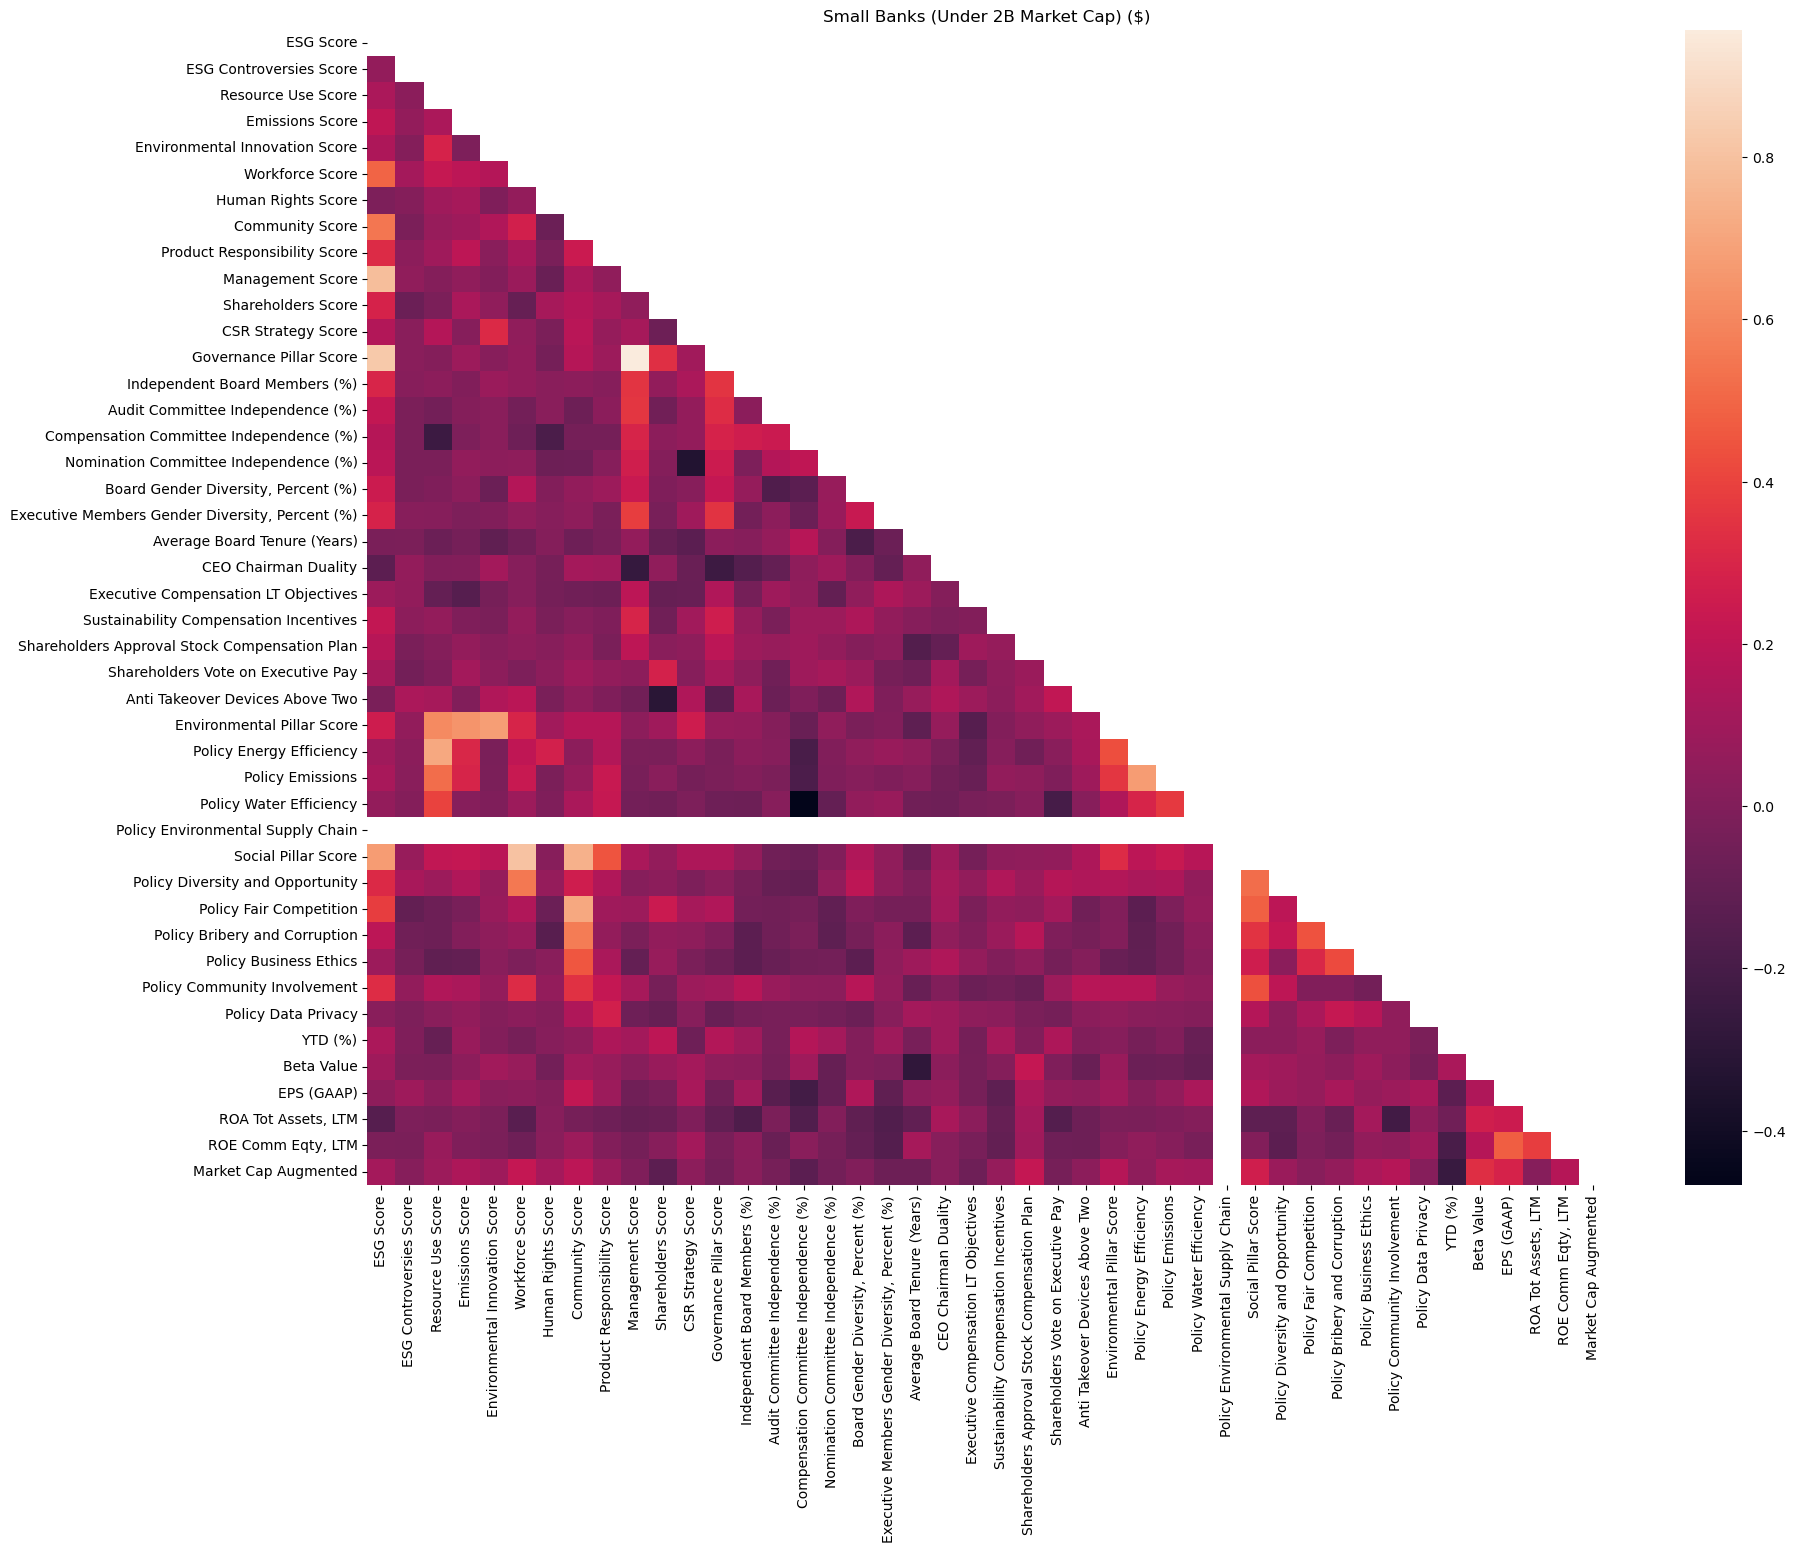

In [77]:
fig, ax = plt.subplots(figsize=(20, 15))
mask = np.triu(np.ones_like(corr4, dtype=bool))
plt.title('Small Banks (Under 2B Market Cap) ($)')
sns.heatmap(corr4, mask=mask);

In [78]:
corr5=medium.corr(numeric_only=True)
corr5

,ESG Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,...,Policy Bribery and Corruption,Policy Business Ethics,Policy Community Involvement,Policy Data Privacy,YTD (%),Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM",Market Cap Augmented
ESG Score,1.000000,-0.126244,0.754752,0.696188,0.601510,0.749239,0.539030,0.664567,0.535209,0.608818,...,0.219656,0.055003,0.229567,NaN,0.119707,0.270659,0.283709,0.058062,0.145154,0.607895
ESG Controversies Score,-0.126244,1.000000,-0.229244,-0.193856,-0.231412,-0.107656,-0.123008,-0.072353,-0.123142,-0.009907,...,-0.007972,-0.016519,-0.048299,NaN,0.011322,0.036127,0.038347,0.081674,0.038515,-0.319189
Resource Use Score,0.754752,-0.229244,1.000000,0.840447,0.536649,0.699469,0.556545,0.525763,0.465739,0.180576,...,0.195878,0.072486,0.181756,NaN,0.082705,0.320002,0.370104,0.076110,0.142779,0.721956
Emissions Score,0.696188,-0.193856,0.840447,1.000000,0.495028,0.657743,0.528586,0.519483,0.440941,0.123317,...,0.208485,0.032192,0.191972,NaN,0.084180,0.247315,0.284525,0.078522,0.152594,0.656920
Environmental Innovation Score,0.601510,-0.231412,0.536649,0.495028,1.000000,0.507068,0.302514,0.356915,0.332750,0.147478,...,0.074951,0.050365,0.094645,NaN,0.155829,0.113560,0.213060,-0.092867,0.078706,0.515519
Workforce Score,0.749239,-0.107656,0.699469,0.657743,0.507068,1.000000,0.445670,0.419531,0.372917,0.148110,...,0.123374,0.000860,0.219071,NaN,0.109444,0.275038,0.306538,0.173472,0.205591,0.616701
Human Rights Score,0.539030,-0.123008,0.556545,0.528586,0.302514,0.445670,1.000000,0.231417,0.190178,0.191677,...,0.040540,-0.207126,0.118489,NaN,-0.013898,0.252803,0.115963,0.018527,0.012169,0.338291
Community Score,0.664567,-0.072353,0.525763,0.519483,0.356915,0.419531,0.231417,1.000000,0.428189,0.204985,...,0.502276,0.241410,0.298315,NaN,0.127302,0.162097,0.143801,-0.150645,-0.021884,0.375548
Product Responsibility Score,0.535209,-0.123142,0.465739,0.440941,0.332750,0.372917,0.190178,0.428189,1.000000,0.114365,...,0.124090,0.077330,0.226103,NaN,0.125251,0.193183,0.138437,-0.004026,0.076644,0.450161
Management Score,0.608818,-0.009907,0.180576,0.123317,0.147478,0.148110,0.191677,0.204985,0.114365,1.000000,...,-0.003324,-0.034649,-0.010929,NaN,0.009074,0.055680,0.091254,0.054652,0.099807,0.157001


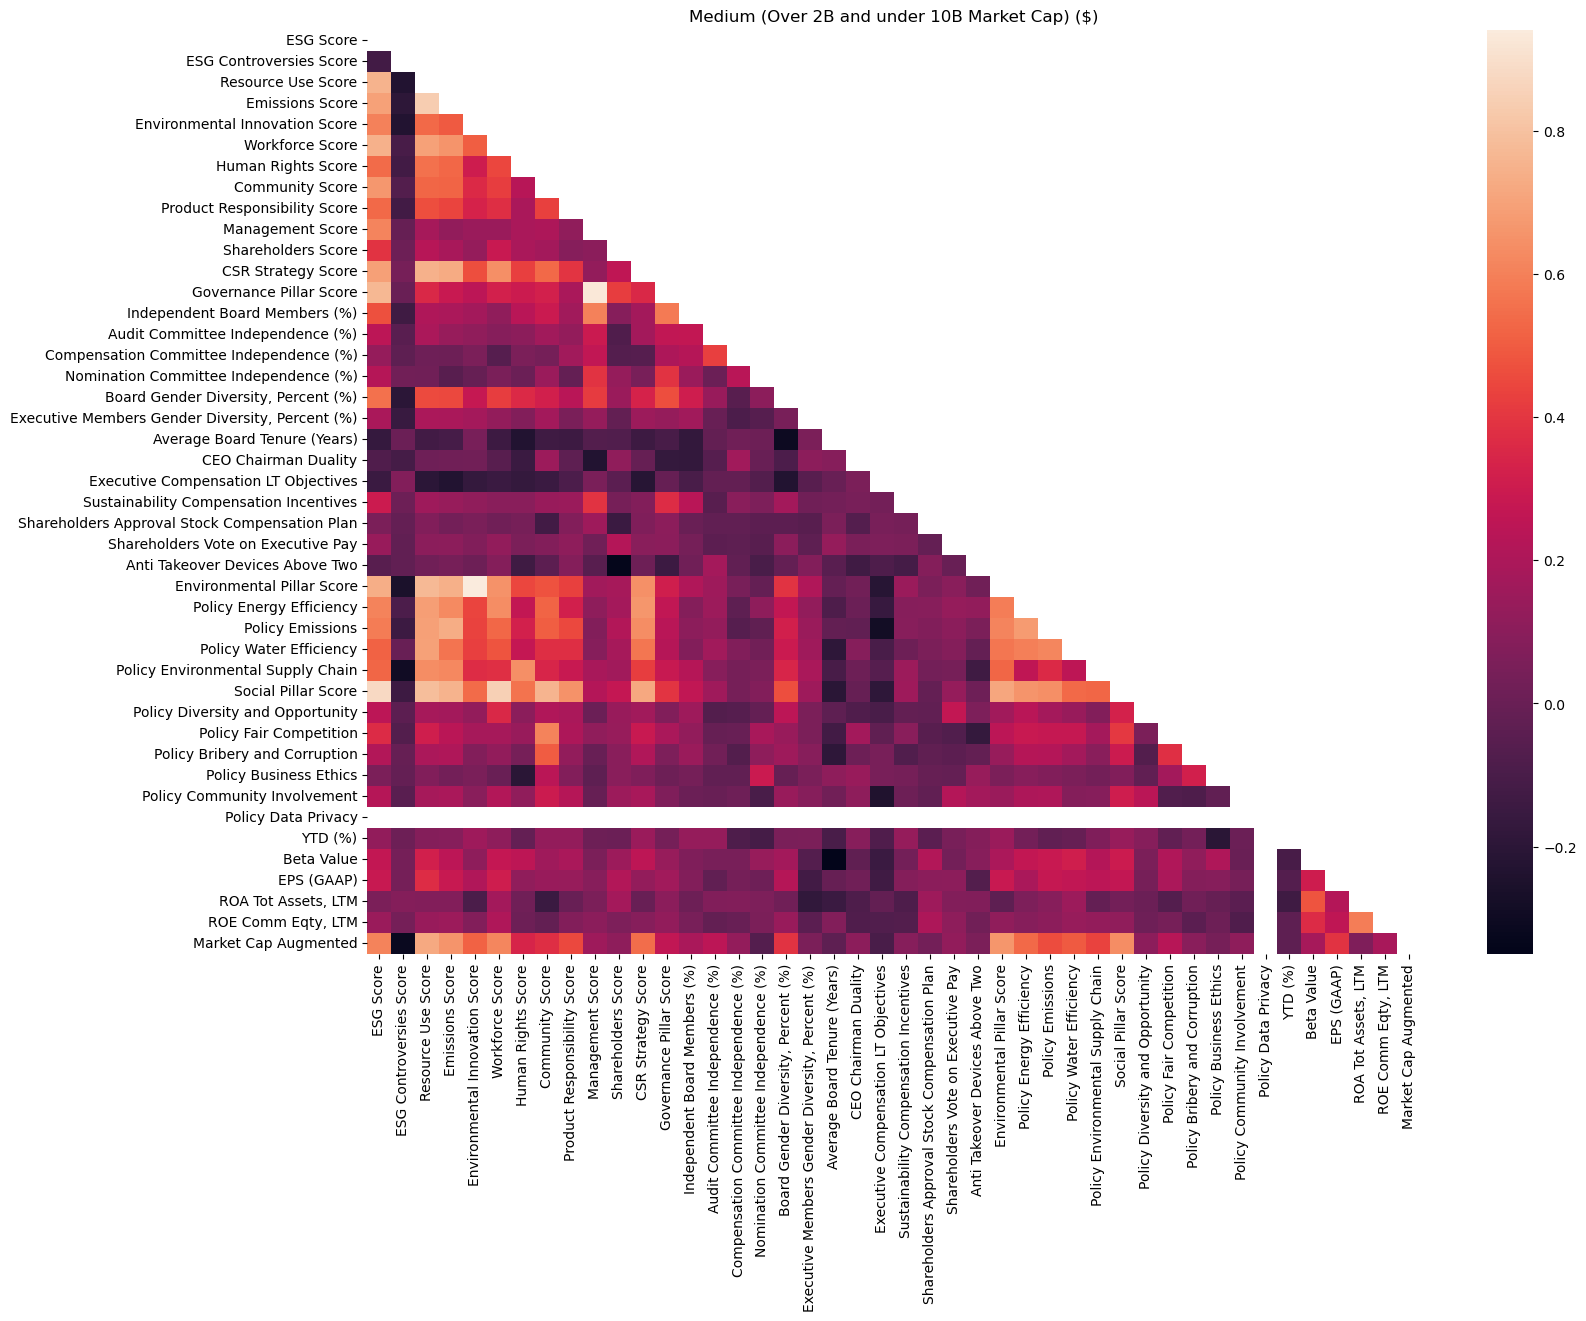

In [79]:
plt.subplots(figsize=(17,12))
plt.title('Medium (Over 2B and under 10B Market Cap) ($)')
mask = np.triu(np.ones_like(corr5, dtype=bool))
sns.heatmap(corr5, mask=mask);

In [80]:
print("~~~~~~~~~~~~~~Medium and Large Banks~~~~~~~~~~~~~~~")
strongm,allm=[],[]
for l in corr5:
    allm.append(l)
    for i in corr5.index:
        if abs(medium[l].corr(medium[i]))>.50 and l!=i:# and not i.__contains__('Score'):
            strongm.append(l)
            strongm.append(i)
            print(l,i, medium[l].corr(medium[i]))
dropm=list(set(allm)-set(strongm))
dropm

            
            
            

~~~~~~~~~~~~~~Medium and Large Banks~~~~~~~~~~~~~~~
ESG Score Resource Use Score 0.754752210203745
ESG Score Emissions Score 0.6961883823999848
ESG Score Environmental Innovation Score 0.6015104988117129
ESG Score Workforce Score 0.7492385571951903
ESG Score Human Rights Score 0.5390303801376125
ESG Score Community Score 0.6645672182510186
ESG Score Product Responsibility Score 0.5352091480854783
ESG Score Management Score 0.6088178622850424
ESG Score CSR Strategy Score 0.6921447271546378
ESG Score Governance Pillar Score 0.76637962831162
ESG Score Board Gender Diversity, Percent (%) 0.5582959407830764
ESG Score Environmental Pillar Score 0.7385832136163696
ESG Score Policy Energy Efficiency 0.6048611883939814
ESG Score Policy Emissions 0.586842467206351
ESG Score Policy Water Efficiency 0.516764198204032
ESG Score Policy Environmental Supply Chain 0.52796664980681
ESG Score Social Pillar Score 0.8795696492875236
ESG Score Market Cap Augmented 0.6078945014425498
Resource Use Score ESG 

['ESG Controversies Score',
 'YTD (%)',
 'Beta Value',
 'Policy Business Ethics',
 'Executive Compensation LT Objectives',
 'Policy Diversity and Opportunity',
 'Compensation Committee Independence (%)',
 'Shareholders Vote on Executive Pay',
 'Policy Data Privacy',
 'EPS (GAAP)',
 'Audit Committee Independence (%)',
 'Policy Community Involvement',
 'Sustainability Compensation Incentives',
 'Shareholders Score',
 'Shareholders Approval Stock Compensation Plan',
 'CEO Chairman Duality',
 'Nomination Committee Independence (%)',
 'Anti Takeover Devices Above Two',
 'Executive Members Gender Diversity, Percent (%)',
 'Average Board Tenure (Years)']

In [81]:
print("~~~~~~~~~~~~~~~~~~Small~~~~~~~~~~~~~~~~~~~~~~~~~~")
strongs,alls=[],[]
for l in corr4:
    alls.append(l)
    for i in corr4.index:
        if abs(small[l].corr(small[i]))>.50 and l!=i:# and not i.__contains__('Score'):
            print(l,i, small[l].corr(small[i]))
            strongs.append(l)
            strongs.append(i)
drops=list(set(alls)-set(strongs))
drops

~~~~~~~~~~~~~~~~~~Small~~~~~~~~~~~~~~~~~~~~~~~~~~
ESG Score Community Score 0.5472071248087294
ESG Score Management Score 0.7879952171045957
ESG Score Governance Pillar Score 0.8280352061984164
ESG Score Social Pillar Score 0.6721728733315735
Resource Use Score Environmental Pillar Score 0.6080195111313833
Resource Use Score Policy Energy Efficiency 0.7095206072436127
Resource Use Score Policy Emissions 0.5213312523568452
Emissions Score Environmental Pillar Score 0.6435948553049585
Environmental Innovation Score Environmental Pillar Score 0.6745537442198949
Workforce Score Social Pillar Score 0.8029429266191136
Workforce Score Policy Diversity and Opportunity 0.5527155934887612
Community Score ESG Score 0.5472071248087294
Community Score Social Pillar Score 0.7432885606656856
Community Score Policy Fair Competition 0.7111608182216704
Community Score Policy Bribery and Corruption 0.5662297032730754
Management Score ESG Score 0.7879952171045957
Management Score Governance Pillar Score 0

['ESG Controversies Score',
 'Human Rights Score',
 'YTD (%)',
 'Beta Value',
 'Board Gender Diversity, Percent (%)',
 'Policy Water Efficiency',
 'Market Cap Augmented',
 'ROE Comm Eqty, LTM',
 'Policy Business Ethics',
 'ROA Tot Assets, LTM',
 'Product Responsibility Score',
 'Executive Compensation LT Objectives',
 'Compensation Committee Independence (%)',
 'Independent Board Members (%)',
 'Shareholders Vote on Executive Pay',
 'Policy Data Privacy',
 'EPS (GAAP)',
 'Audit Committee Independence (%)',
 'CSR Strategy Score',
 'Sustainability Compensation Incentives',
 'Shareholders Score',
 'Policy Community Involvement',
 'Shareholders Approval Stock Compensation Plan',
 'CEO Chairman Duality',
 'Nomination Committee Independence (%)',
 'Anti Takeover Devices Above Two',
 'Executive Members Gender Diversity, Percent (%)',
 'Average Board Tenure (Years)',
 'Policy Environmental Supply Chain']

In [82]:
corm=medium.drop(dropm, axis=1)
cors=small.drop(drops, axis=1)
 
 

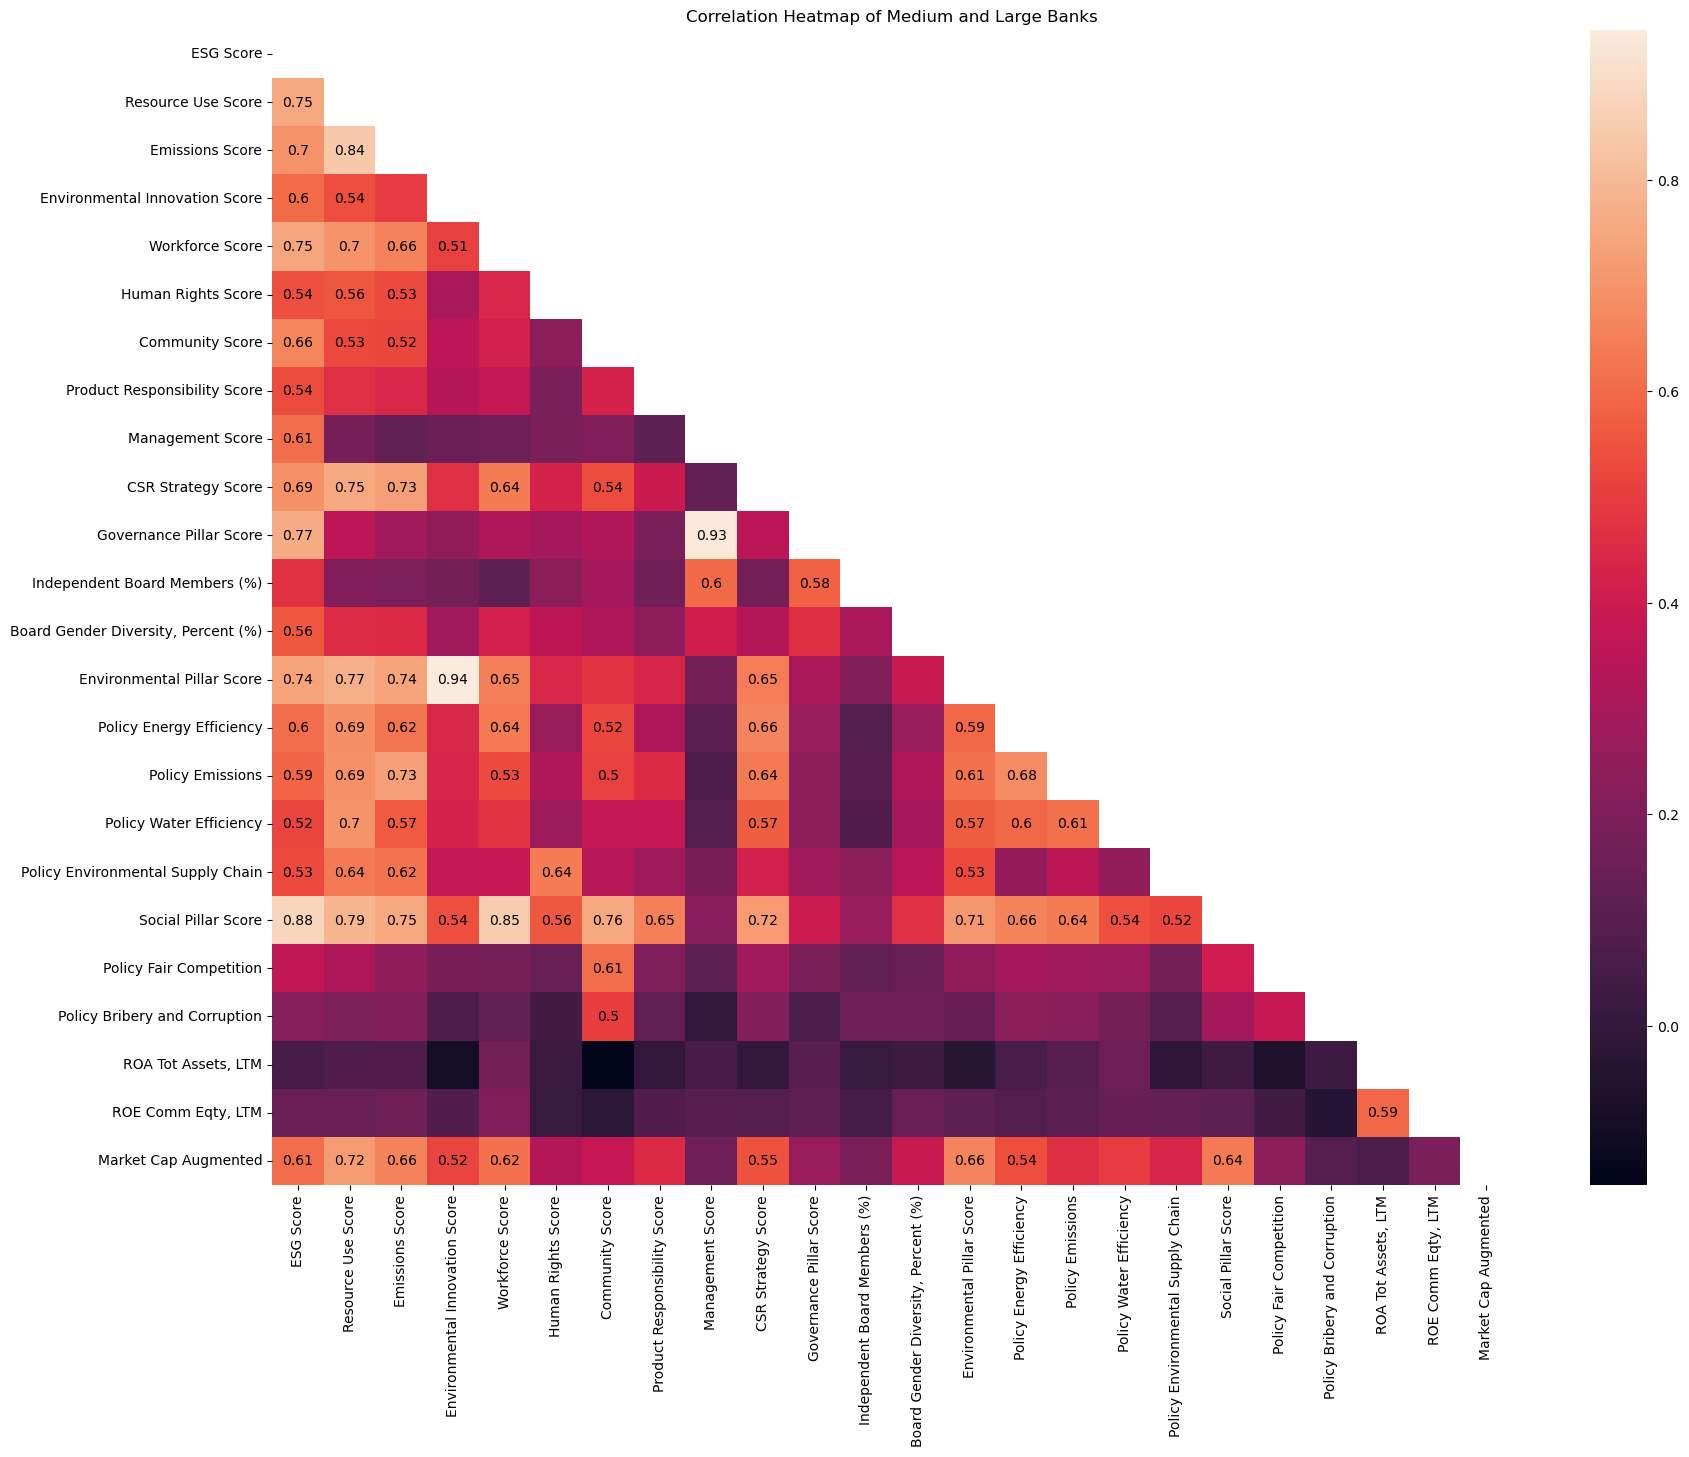

In [83]:
medpresent=corm.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(20, 15))
mask = np.triu(np.ones_like(medpresent, dtype=bool))
sns.heatmap(medpresent, mask=mask);

for i in range(len(medpresent)):
    for j in range(len(medpresent)):
        if i != j:
            if medpresent.iloc[i, j] > 0.50 and mask[j][i]:
                ax.text(j + 0.5, i + 0.5, round(medpresent.iloc[i,j],2), ha='center', va='center')
            elif medpresent.iloc[i, j] < -0.5 and mask[j][i]:
                ax.text(j + 0.5, i + 0.5, round(medpresent.iloc[i,j],2), ha='center', va='center', color='white')

ax.set_title('Correlation Heatmap of Medium and Large Banks')


plt.show()

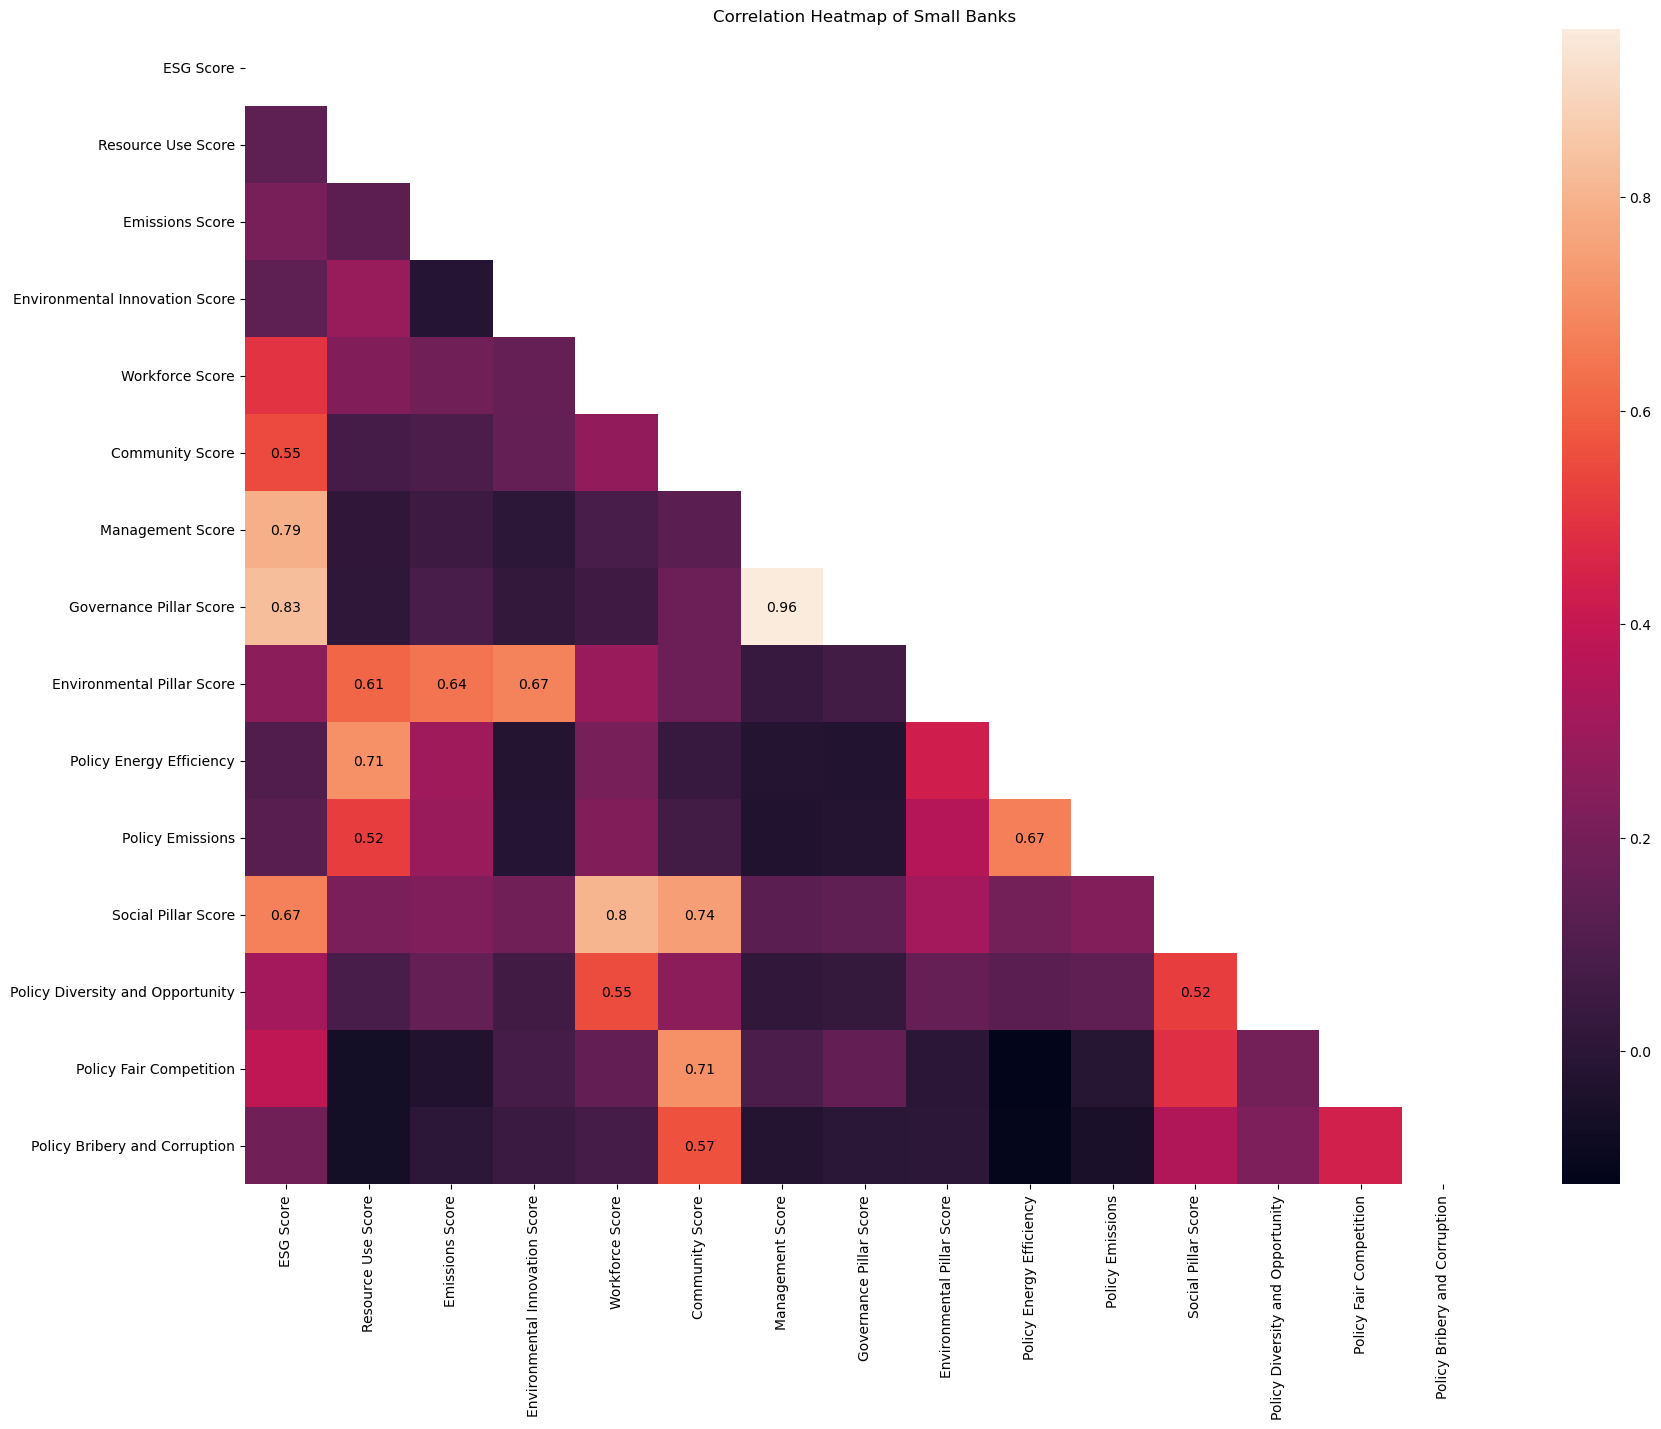

In [84]:
spresent=cors.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(20, 15))
mask1 = np.triu(np.ones_like(spresent, dtype=bool))
sns.heatmap(spresent, mask=mask1);

for i in range(len(spresent)):
    for j in range(len(spresent)):
        if i != j:
            if spresent.iloc[i, j] > 0.5 and mask1[j][i]:
                ax.text(j + 0.5, i + 0.5, round(spresent.iloc[i,j],2), ha='center', va='center')
            elif spresent.iloc[i, j] < -0.5 and mask1[j][i]:
                ax.text(j + 0.5, i + 0.5, round(spresent.iloc[i,j],2), ha='center', va='center', color='white')

ax.set_title('Correlation Heatmap of Small Banks')
plt.show()